In [1]:
from sympy import *
import sympy

In [2]:
init_printing()

In [3]:
m,th,ph,kx,ky=symbols('m theta phi kx ky',positive=True)
t,t1,t2,t3,mz=symbols('t t1 t2 t3 mz',positive=True)

In [4]:
def mataf(h):
    'Array flatten a matrix list of appropriate dimensions'
    H=Matrix.hstack(*h[0])
    for sor in range(1,len(h)):
        H=Matrix.vstack(H,Matrix.hstack(*h[sor]))
    return H

In [5]:
S1=sympy.physics.matrices.msigma(1)
S2=sympy.physics.matrices.msigma(2)
S3=sympy.physics.matrices.msigma(3)
S0=S1*S1
N=0*S0
S=Matrix([[S1],[S2],[S3]])

In [6]:
a1=Matrix([[sqrt(3)],
           [1]])/2
a2=Matrix([[-sqrt(3)],
           [1]])/2
k=Matrix([[kx,ky]])

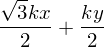

In [7]:
(k*a1)[0]

In [13]:
U=mataf([[N,N,N,N,t*S0,t*S0],
         [N,N,N,t*S0,t*S0,N],
         [N,N,N,t*S0,N,t*S0],
         [N,t*S0,t*S0,N,N,N],
         [t*S0,t*S0,N,N,N,N],
         [t*S0,N,t*S0,N,N,N]])
T1=mataf([[N,N,N,N,N,N],
          [N,N,N,N,N,t*S0+I*mz*S3],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
T2=mataf([[N,N,N,t*S0+I*mz*S3,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
T3=mataf([[N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,t*S0+I*mz*S3,N,N,N],
          [N,N,N,N,N,N]])

In [14]:
H=U+exp(I*(k*a1)[0])*T1+exp(I*(k*a2)[0])*T2+exp(I*(k*(a1+a2))[0])*T3+\
   (exp(I*(k*a1)[0])*T1+exp(I*(k*a2)[0])*T2+exp(I*(k*(a1+a2))[0])*T3).H

In [15]:
HG=(((H).subs(kx,0)).subs(ky,0))
HM=(((H).subs(kx,2*pi/sqrt(3))).subs(ky,0))